# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2383 Ноздрин Василий Ярославович и Плюсов Даниил Александрович. Вариант №10.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

### Дискретный единичный скачок  

$$
    \sigma_d(k) = \begin{cases}
    1, & k \ge 0 \\
    0, & k < 0
    \end{cases}
$$

### Дискретный прямоугольный импульс  

Дискретный прямоугольный импульс $s_1(k)$ с амплитудой $U$, начинающийся в момент $n_0$ и имеющий длительность $n_{imp}$ отсчетов, может быть представлен как разность двух взвешенных и задержанных дискретных единичных скачков $\sigma_d(k)$.

$$
    s_1(k) = U \cdot [\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{imp}))]
$$

### Линейная комбинация сигналов  

Линейная комбинация сигналов - это взвешенная сумма нескольких сигналов. Если у нас есть три сигнала $x_1(k), x_2(k), x_3(k)$ и три весовых коэффициента $a_1, a_2, a_3$, их линейная комбинация $s_2(k)$ вычисляется как:
$$
    s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)
$$

Это соответствует поэлементному умножению каждой последовательности на ее коэффициент и последующему поэлементному сложению результатов.

### Характеристики дискретной последовательности  

* **Среднее значение ($\mu$)**: Арифметическое среднее всех отсчетов последовательности на заданном интервале длиной $L$.

$$
    \mu = \frac{1}{L} \sum_{k=0}^{L-1} s_2(k)
$$


* **Энергия ($E$)**: Сумма квадратов значений всех отсчетов последовательности. Для ЦОС это аналог интеграла от квадрата аналогового сигнала.

$$
    E = \sum_{k=0}^{L-1} [s_2(k)]^2
$$


* **Средняя мощность ($P$)**: Энергия сигнала, отнесенная к его длительности (количеству отсчетов $L$).

$$
    P = \frac{E}{L} = \frac{1}{L} \sum_{k=0}^{L-1} [s_2(k)]^2
$$

### Дискретный гармонический сигнал с экспоненциально огибающей

Дискретный сигнал $s_3(k)$ представляет собой произведение двух последовательностей:

1.  **Дискретный гармонический сигнал (несущее колебание):**

$$ s(k) = C \cos(\hat{\omega}_0 k) $$


2.  **Экспоненциальная огибающая:**

$$|a|^k$$


Таким образом, аналитическая формула для итогового сигнала $s_3(k)$ выглядит следующим образом:

$$
    s_3(k) = |a|^k \cdot C \cos(\hat{\omega}_0 k)
$$


### Периодическая последовательность  

Периодическая последовательность $s_4(k)$ с периодом $T$ может быть смоделирована с помощью функции $s_p(k)$, определенной на промежутке $(0, T-1)$, периодическим доопределением (повторением) на всю область определения:

$$
    s_4(k) = s_p(k \mod T)
$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [1]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt


Nb = 10
# Длина последовательности
N = 30 + Nb % 5
# Основание экспоненты
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20))
# Амплитуда гармонического сигнала
C = 1 + Nb % 5
# Частота гармонического сигнала
w0 = np.pi / (6 + Nb % 5)
# Амплитуда импульса
U = Nb % 20 + 1
# Начальный момент импульса
n0 = 3 + Nb % 5
# Длина импульса
n_imp = 5 + Nb % 5
# Амплитуды гармонических сигналов
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
# Частоты гармонических сигналов
w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)
w_vector = np.array([w1, w2, w3])
# Коэффициенты линейной комбинации гармонических сигналов
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5
# Время
n_vector = np.arange(N)

| Переменная | Назначение | Значение | Идентификатор |  
| --- | --- | --- | --- |  
| $N_{бр}$ | Номер бригады | $N_{бр}$ | $Nb$ |  
| N | Длина последовательности | $N=30+N_{бр}mod 5$ | N |  
| a | Основание экспоненты | $a=(−1)^{N_{бр}}⋅(0.8+0.005⋅N_{бр}mod20))$ | a |  
| C | Амплитуда гармонического сигнала | $C=1+N_{бр}mod5$ | C |  
| $\hat{\omega} (рад)$ | Частота гармонического сигнала | $\hat{\omega}_0 = π / (6 + N_{бр} mod 5)$ | $w0$ |  
| U | Амплитуда импульса  | $U=N_{бр}mod20+1$ | U |  
| $n_0$ | Начальный момент импульса  | $n_0=3+N_{бр} mod 5$ | n0 |  
| $n_{imp}$ | Длина импульса  | $n_0=3+N_{бр} mod 5$ | n_imp |  
| $B_1$ | Амплитуды гармонических сигналов  | $B_1=1.5+N_{бр} mod 5$ | B1 |  
| $B_2$ | Амплитуды гармонических сигналов | $B_2=5.7-N_{бр} mod 5$ | B2 |  
| $B_3$ | Амплитуды гармонических сигналов | $B_3=2.2+N_{бр} mod 5$ | B3 |  
| $\hat{\omega}_1$ | Частоты гармонических сигналов | $\hat{\omega}_1=\pi / (4+N_{бр} mod 5)$ | w1 |  
| $\hat{\omega}_2$ | Частоты гармонических сигналов | $\hat{\omega}_2=\pi / (8+N_{бр} mod 5)$ | w2 |  
| $\hat{\omega}_3$ | Частоты гармонических сигналов | $\hat{\omega}_3=\pi / (16+N_{бр} mod 5)$ | w3 |  
| $a_1$ | Коэффициенты линейной комбинации гармонических сигналов | $a_1=1.5-N_{бр} mod 5$ | a1 |  
| $a_2$ | Коэффициенты линейной комбинации гармонических сигналов | $a_2=0.7+N_{бр} mod 5$ | a2 |  
| $a_3$ | Коэффициенты линейной комбинации гармонических сигналов | $a_3=1.4+N_{бр} mod 5$ | a3 |  




### 1. Моделирование дискретного прямоугольного импульса

Моделирование прямоугольного импульса $s_1(k)$ выполняется путем линейной комбинации двух дискретных единичных скачков $\sigma_d(k)$:

1.  Создается включающий сигнал $\sigma_d(k - n_0)$, который равен 1, начиная с отсчета $k=n_0$.
2.  Создается выключающий сигнал $\sigma_d(k - (n_0 + n_{imp}))$, который равен 1, начиная с отсчета $k = n_0 + n_{imp}$.
3.  Из включающего сигнала вычитается выключающий. Их разность равна 1 только в интервале $n_0 \le k \le n_0 + n_{imp} - 1$, и 0 во всех остальных точках.
# 4.  Полученный сигнал домножается на амплитуду $U$, формируя итоговый прямоугольный импульс.

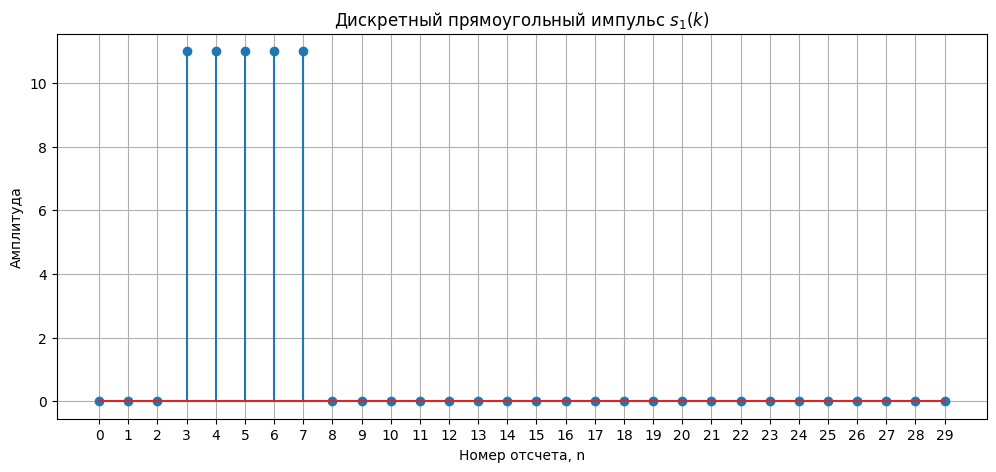

In [2]:
def hs(x, delay=0):
    return np.heaviside(x - delay, 1)


def s_1(k, U, n0, n_imp):
    return U * (hs(k, n0) - hs(k - (n0 + n_imp)))


plt.figure(figsize=(12, 5))
plt.stem(n_vector, s_1(n_vector, U, n0, n_imp))
plt.title(r'Дискретный прямоугольный импульс $s_1(k)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.xticks(np.arange(0, N, 1))
plt.grid(True)
plt.show()

### 2. Моделирование линейной комбинации дискретных гармонических сигналов

#### a. Операции при моделировании линейной комбинации сигналов $s_2(k)$

1. **Генерация компонентов:** Сначала для каждого номера отсчета $k$ на заданном интервале вычисляются значения трех отдельных гармонических сигналов: $x_1(k)$, $x_2(k)$ и $x_3(k)$, где
$$x_i(k) = B_i \sin(\hat{\omega}_i k), \quad i=1,2,3$$

2. **Масштабирование:** Каждый из трех сигналов поэлементно умножается на свой весовой коэффициент:
$$a_i x_i(k), i = 1\dots 3$$

3. **Суммирование:** Три взвешенных сигнала поэлементно складываются, образуя итоговую последовательность $s_2(k)$.

#### b. Как определяются указанные характеристики.  

1. **Среднее значение $\mu_{s2}$** вычисляется как сумма всех отсчетов последовательности $s_2(k)$, деленная на их количество. Так как сигнал является суммой синусоид, среднее значение которых равно нулю, его теоретическое среднее значение также равно нулю. Полученное в ходе моделирования значение $0.2840$ не совпадает с теоретическим, т.к. рассматривается достаточно маленький отрезок $n \in [0;5N-1]$, при большей длине отрезка среднее значение будет стремиться к нулю.

2. **Энергия E** вычисляется как сумма квадратов амплитуд всех отсчетов последовательности $s_2(k)$. Эта величина характеризует "полную энергию" сигнала на заданном конечном интервале.

3. **Средняя мощность P** вычисляется как отношение полной энергии $E$ к количеству отсчетов $L$. Эта характеристика показывает среднюю энергию, приходящуюся на один отсчет сигнала.

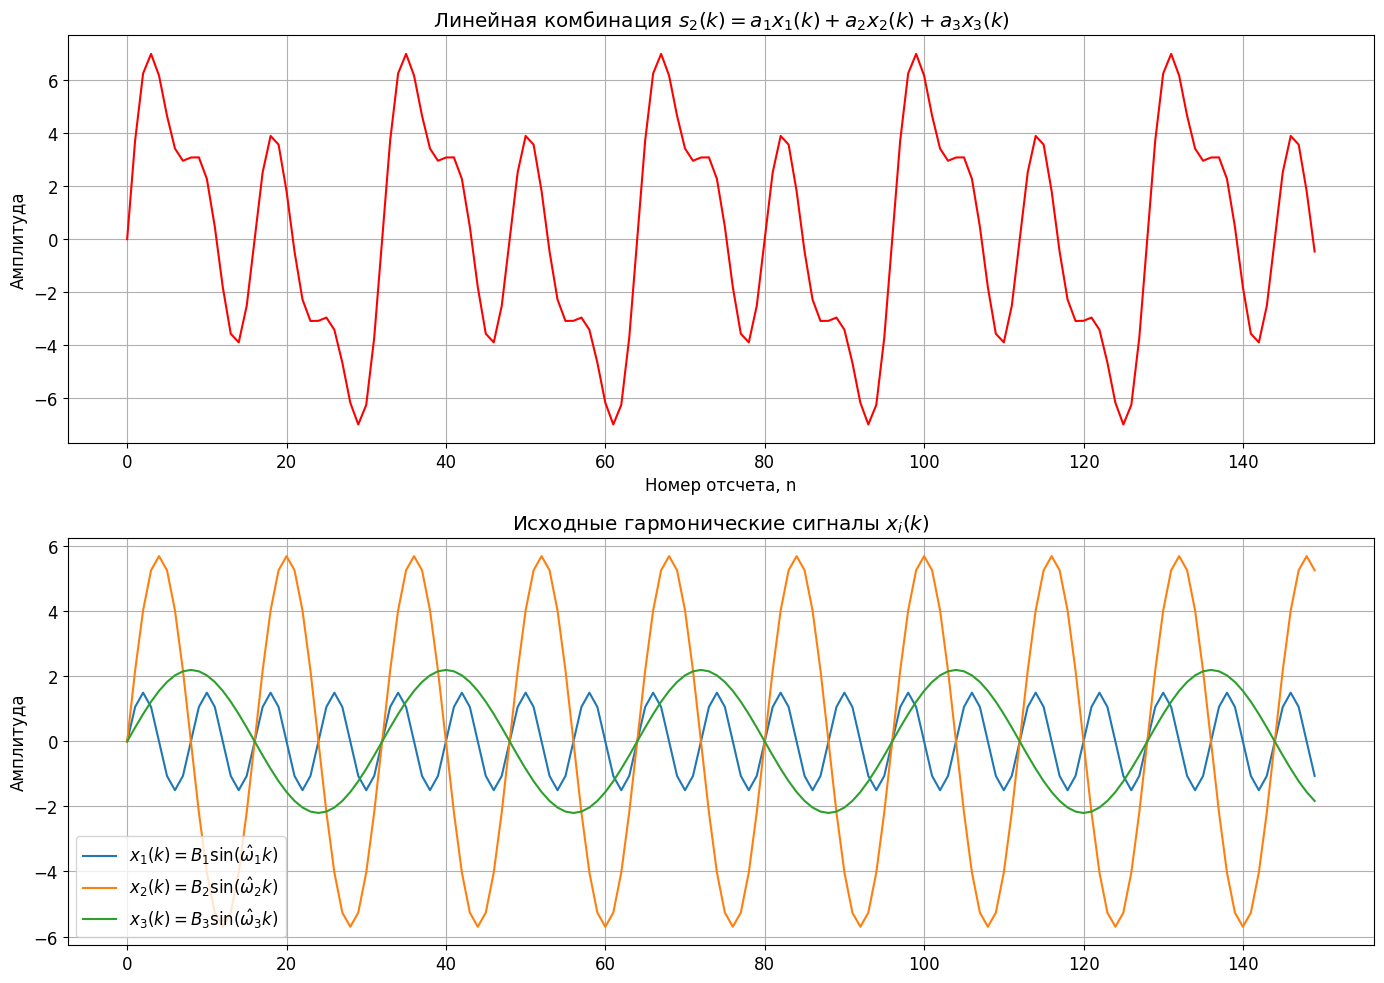

Характеристики сигнала s2(k)
Среднее значение (mean_s2): 0.2840
Энергия (E): 2231.4742
Средняя мощность (P): 14.8765


In [3]:
N_s2 = 5 * N
n_vector_s2 = np.arange(N_s2)

B_vector = np.array([B1, B2, B3])
x_signals = B_vector * np.sin(w_vector * n_vector_s2[:, None])

A_vector = np.array([a1, a2, a3])
s2_signal = x_signals @ A_vector

plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 12

plt.subplot(2, 1, 1)
plt.plot(n_vector_s2, s2_signal, color='red')
plt.title(r'Линейная комбинация $s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n_vector_s2, x_signals[:, 0], label=r'$x_1(k) = B_1 \sin(\hat{\omega}_1 k)$')
plt.plot(n_vector_s2, x_signals[:, 1], label=r'$x_2(k) = B_2 \sin(\hat{\omega}_2 k)$')
plt.plot(n_vector_s2, x_signals[:, 2], label=r'$x_3(k) = B_3 \sin(\hat{\omega}_3 k)$')
plt.title('Исходные гармонические сигналы $x_i(k)$')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Характеристики сигнала s2(k)")
print(f"Среднее значение (mean_s2): {np.mean(s2_signal):.4f}")
print(f"Энергия (E): {np.sum(s2_signal**2):.4f}")
print(f"Средняя мощность (P): {np.sum(s2_signal**2) / len(s2_signal):.4f}")

### 3. Моделирование дискретного гармонического сигнала с экспоненциальной огибающей

1. **Создание гармонической последовательности:**
$$C \cos(\hat{\omega}_0 k)$$
 для всех отсчетов $k \in [0;N-1]$.

2. **Создание экспоненциальной огибающей:**
$$|a|^k$$
 для всех отсчетов $k \in [0;N-1]$.

3.  **Поэлементное умножение:**
$$s_3(k) = C \cos(\hat{\omega}_0 k) ⋅ |a|^k$$

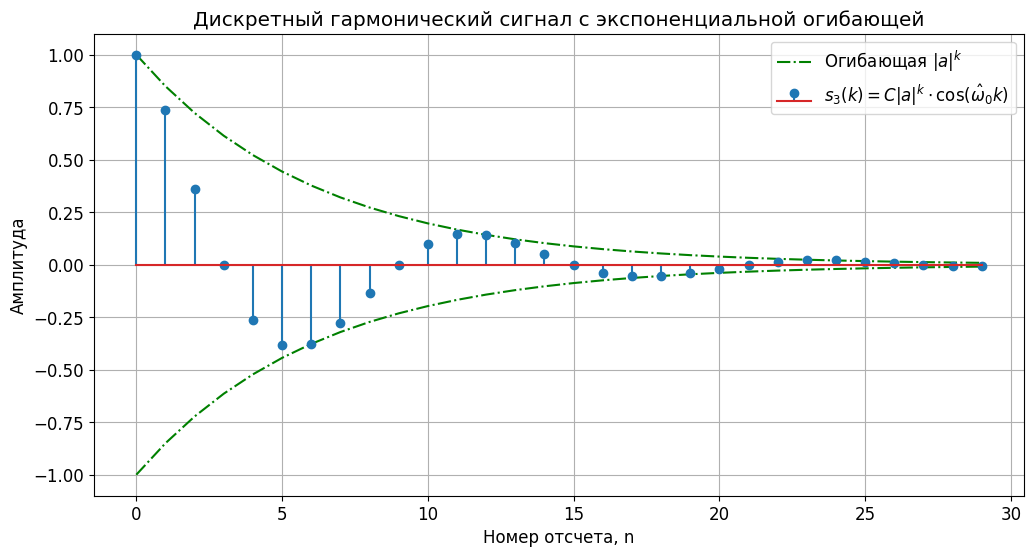

In [4]:
amplitude = C
decay_factor = np.abs(a)
frequency = w0

carrier_wave = np.cos(frequency * n_vector)
exponential_envelope = decay_factor ** n_vector
s3_signal = amplitude * exponential_envelope * carrier_wave


plt.figure(figsize=(12, 6))

plt.plot(n_vector, -exponential_envelope, 'g-.')
plt.plot(n_vector, exponential_envelope, 'g-.', label=r'Огибающая $|a|^k$')
plt.stem(n_vector, s3_signal, label=r'$s_3(k) = С |a|^k \cdot \cos(\hat{\omega}_0 k)$')

plt.title('Дискретный гармонический сигнал с экспоненциальной огибающей')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()

### Моделирование периодической последовательности $s_4$

1. **Определение периода.**
По условию, период $T = 2 * n_{imp}$.

2.  **Вычисление значения.**
На сужении $s_4$ на $[0, T]$:
$$
  s_4(k) = s_1(k, U, n_0, n_{imp})
$$

3.  **Периодическое повторение.**
Доопределим $s_4$ на всю область определения. Аналитически это будет записываться:
$$
  s_4(k) = s_1(k \mod T, U, n_0, n_{imp})
$$
В случае работы с сигналом (последовательностью), достаточно просто повторить ее нужное число раз (по условию - 5).

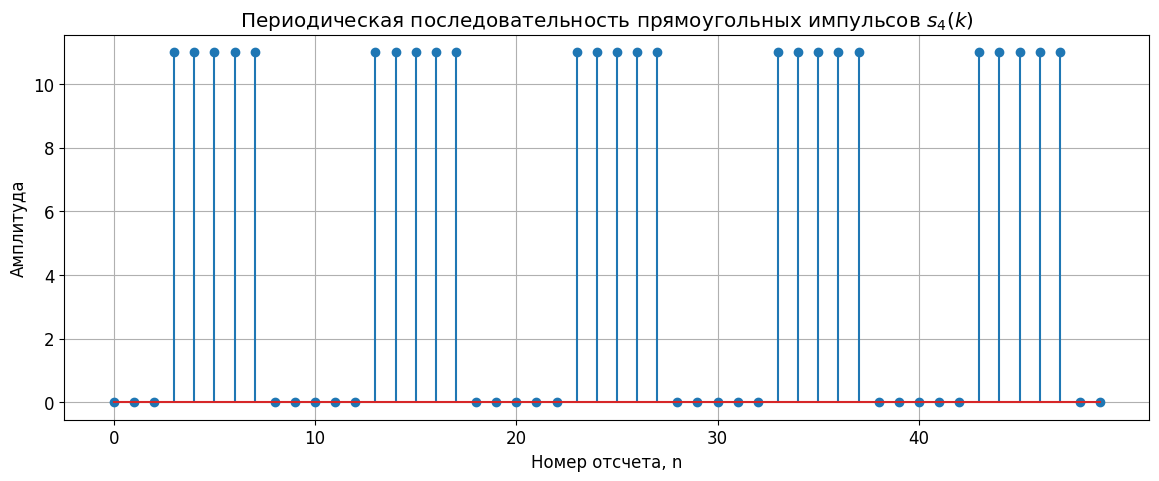

In [5]:
T = 2 * n_imp
one_period = s_1(np.arange(T), U, n0, n_imp)

s4_signal = np.tile(one_period, 5)
n_vector_s4 = np.arange(len(s4_signal))

plt.figure(figsize=(14, 5))
plt.stem(n_vector_s4, s4_signal)
plt.title(r'Периодическая последовательность прямоугольных импульсов $s_4(k)$')
plt.xlabel('Номер отсчета, n')
plt.ylabel('Амплитуда')
plt.xticks(np.arange(0, T * 5, T))
plt.grid(True)
plt.show()

## Выводы

В ходе выполнения практической работы, с помощью программных средств были смоделированы и проанализированы следующие стандартные дискретные последовательности:

* дискретный прямоугольный сигнал
* линейная комбинация дискретных гармонических сигналов - для данного сигнала были вычислены среднее значение, энергия и средняя мощность
* дискретный гармонический сигнал - для данного сигнала была определена аналитическая формула
* периодическая последовательность дискретных прямоугольных импульсов (из п.1)

Для смоделированных сигналов были построены графики.